In [2]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

import regionmask

import pandas as pd
import geopandas as gpd
import dask_geopandas as dgpd
from shapely.geometry import Point
from dask import dataframe as dd

import polars as pl


%matplotlib inline

In [3]:
ds = xr.open_dataset('/workspace/soil-ml-modeling-pipeline/ml-modeling-pipeline/data/01_raw/power_nasa_data.nc')

In [4]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:            (time: 8498, lat: 48, lon: 60)
Coordinates:
  * time               (time) datetime64[ns] 68kB 2001-01-01 ... 2024-04-07
  * lat                (lat) float64 384B -4.5 -4.0 -3.5 -3.0 ... 18.0 18.5 19.0
  * lon                (lon) float64 480B 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0
Data variables: (12/14)
    PRECTOTCORR        (time, lat, lon) float64 196MB ...
    EVPTRNS            (time, lat, lon) float64 196MB ...
    T2M                (time, lat, lon) float64 196MB ...
    TS                 (time, lat, lon) float64 196MB ...
    PS                 (time, lat, lon) float64 196MB ...
    WS2M               (time, lat, lon) float64 196MB ...
    ...                 ...
    RH2M               (time, lat, lon) float64 196MB ...
    GWETROOT           (time, lat, lon) float64 196MB ...
    GWETPROF           (time, lat, lon) float64 196MB ...
    GWETTOP            (time, lat, lon) float64 196MB ...
    CLOUD_AMT          (time, lat, lon) float64 196MB ...
    ALLSKY_SFC_SW_DWN  (time, lat, lon) float64 196MB ...

In [5]:
df_pandas = ds.to_dataframe().reset_index()

# Close the dataset
ds.close()


In [6]:
df_pandas.head()

,time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
0,2001-01-01,-4.5,22.5,0.000043,107.140625,296.804688,296.453125,95028.0000,0.234375,0.921875,0.017090,88.6875,0.523438,0.531250,0.609375,96.773438,70.937500
1,2001-01-01,-4.5,23.0,0.000069,98.840625,296.879687,296.621875,95095.4500,0.234375,0.878125,0.017334,89.4875,0.604688,0.612500,0.678125,97.851562,76.527344
2,2001-01-01,-4.5,23.5,0.000068,98.514062,296.809375,296.509375,94904.9000,0.210938,0.853125,0.017249,89.3125,0.657813,0.646875,0.718750,98.929688,82.117188
3,2001-01-01,-4.5,24.0,0.000054,92.179688,296.831250,296.606250,94647.9750,0.276562,1.003125,0.017078,88.4625,0.685937,0.668750,0.734375,99.144531,89.527344
4,2001-01-01,-4.5,24.5,0.000039,83.300000,297.003125,296.982813,94506.4625,0.523438,1.365625,0.016907,87.0250,0.706250,0.706250,0.739062,99.359375,96.937500


In [7]:
# Convert the Pandas DataFrame to a Polars DataFrame
df_polars = pl.from_pandas(df_pandas)
del df_pandas

In [8]:
df_polars

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
datetime[ns],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2001-01-01 00:00:00,-4.5,22.5,0.000043,107.140625,296.804688,296.453125,95028.0,0.234375,0.921875,0.01709,88.6875,0.5234375,0.53125,0.609375,96.773438,70.9375
2001-01-01 00:00:00,-4.5,23.0,0.000069,98.840625,296.879687,296.621875,95095.45,0.234375,0.878125,0.017334,89.4875,0.6046875,0.6125,0.678125,97.851562,76.527344
2001-01-01 00:00:00,-4.5,23.5,0.000068,98.514062,296.809375,296.509375,94904.9,0.2109375,0.853125,0.017249,89.3125,0.6578125,0.646875,0.71875,98.929688,82.117188
2001-01-01 00:00:00,-4.5,24.0,0.000054,92.179688,296.83125,296.60625,94647.975,0.2765625,1.003125,0.017078,88.4625,0.6859375,0.66875,0.734375,99.144531,89.527344
2001-01-01 00:00:00,-4.5,24.5,0.000039,83.3,297.003125,296.982813,94506.4625,0.5234375,1.365625,0.016907,87.025,0.70625,0.70625,0.7390625,99.359375,96.9375
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-04-07 00:00:00,19.0,50.0,0.0,null,303.75,305.398438,97302.5,2.9921875,4.0546875,0.007019,26.25,null,null,null,null,null
2024-04-07 00:00:00,19.0,50.5,0.0,null,303.78125,305.579687,97441.2,2.7171875,3.7296875,0.006335,23.65,null,null,null,null,null
2024-04-07 00:00:00,19.0,51.0,0.0,null,303.760938,305.732813,97548.6625,2.3953125,3.3765625,0.005652,21.0875,null,null,null,null,null


In [9]:
import polars as pl
from datetime import datetime

# Convert string to datetime for comparison using Python's datetime module
start_date = datetime.strptime("2023-11-26 00:00:00", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2023-12-04 00:00:00", "%Y-%m-%d %H:%M:%S")

# Assuming `df_polars` is your Polars DataFrame
df_filtered = df_polars.filter(
    (df_polars['time'] >= pl.lit(start_date)) & (df_polars['time'] <= pl.lit(end_date))
)


In [10]:
df_filtered

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
datetime[ns],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-11-26 00:00:00,-4.5,22.5,0.000013,26.234375,296.484375,295.984375,95151.25,0.1640625,0.5546875,0.016113,85.5,0.390625,0.3984375,0.4453125,87.21875,155.054688
2023-11-26 00:00:00,-4.5,23.0,0.00003,17.834375,295.965625,295.790625,95223.5,0.1515625,0.6109375,0.017236,93.8,0.503125,0.5046875,0.5828125,90.664062,162.296875
2023-11-26 00:00:00,-4.5,23.5,0.000043,25.442187,295.803125,295.653125,95032.575,0.1296875,0.6765625,0.017371,95.1625,0.6015625,0.5828125,0.6734375,94.109375,169.539062
2023-11-26 00:00:00,-4.5,24.0,0.000073,39.223438,295.871875,295.740625,94776.175,0.2390625,0.9453125,0.017078,93.3125,0.6671875,0.6421875,0.7265625,91.738281,175.484375
2023-11-26 00:00:00,-4.5,24.5,0.000121,52.25625,296.1,296.073438,94638.5625,0.56875,1.4421875,0.016772,90.725,0.7109375,0.690625,0.7625,89.367188,181.429688
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-04 00:00:00,19.0,50.0,0.0,0.3359375,294.601562,295.773438,98275.0625,2.5625,3.5546875,0.006653,43.0625,0.109375,0.109375,0.0859375,3.099609,209.242188
2023-12-04 00:00:00,19.0,50.5,0.0,0.5671875,294.782812,295.967188,98385.9625,2.4125,3.3859375,0.006995,44.9625,0.096875,0.096875,0.0796875,0.511719,210.78125
2023-12-04 00:00:00,19.0,51.0,0.0,1.0140625,294.917188,296.076563,98470.6875,2.309375,3.2828125,0.0073,46.7125,0.103125,0.1078125,0.0875,1.199219,210.240234


In [11]:
def calculate_missing_percentages(df: pl.DataFrame) -> pl.DataFrame:
    """
    Calculates the percentage of missing values in each column of a Polars DataFrame.

    Parameters:
    - df (pl.DataFrame): The input DataFrame with potentially missing values.

    Returns:
    - pl.DataFrame: A DataFrame with one row showing the percentage of missing values for each column.

    Example of usage:
    missing_percentages = calculate_missing_percentages(polars_df)
    print(missing_percentages)
    """
    total_rows = df.height  # Access the number of rows in the DataFrame
    missing_counts = df.select([pl.col(column).is_null().sum().alias(column) for column in df.columns])
    missing_percentage = missing_counts / total_rows * 100
    
    return missing_percentage

In [12]:
missing_percentages = calculate_missing_percentages(df_polars)
missing_percentages

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,18.578996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.578996,18.578996,1.141445,1.141445,1.141445


In [13]:
# Drop rows where any cell has NaN
clean_df = df_polars.drop_nulls()

In [14]:
clean_df

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
datetime[ns],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2001-01-01 00:00:00,-4.5,22.5,0.000043,107.140625,296.804688,296.453125,95028.0,0.234375,0.921875,0.01709,88.6875,0.5234375,0.53125,0.609375,96.773438,70.9375
2001-01-01 00:00:00,-4.5,23.0,0.000069,98.840625,296.879687,296.621875,95095.45,0.234375,0.878125,0.017334,89.4875,0.6046875,0.6125,0.678125,97.851562,76.527344
2001-01-01 00:00:00,-4.5,23.5,0.000068,98.514062,296.809375,296.509375,94904.9,0.2109375,0.853125,0.017249,89.3125,0.6578125,0.646875,0.71875,98.929688,82.117188
2001-01-01 00:00:00,-4.5,24.0,0.000054,92.179688,296.83125,296.60625,94647.975,0.2765625,1.003125,0.017078,88.4625,0.6859375,0.66875,0.734375,99.144531,89.527344
2001-01-01 00:00:00,-4.5,24.5,0.000039,83.3,297.003125,296.982813,94506.4625,0.5234375,1.365625,0.016907,87.025,0.70625,0.70625,0.7390625,99.359375,96.9375
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-01-01 00:00:00,19.0,50.0,0.0,0.21875,294.921875,295.84375,98189.5625,2.2890625,3.34375,0.007019,43.75,0.1015625,0.109375,0.078125,7.087891,204.916016
2024-01-01 00:00:00,19.0,50.5,0.0,0.34375,295.078125,296.03125,98313.5625,2.1140625,3.13125,0.007214,44.6,0.0953125,0.096875,0.078125,7.734375,199.835938
2024-01-01 00:00:00,19.0,51.0,0.0,0.628125,295.13125,296.096875,98409.3625,1.98125,2.9984375,0.007483,46.425,0.103125,0.103125,0.0875,8.5859375,200.849609


In [15]:
missing_percentages = calculate_missing_percentages(clean_df)
missing_percentages

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


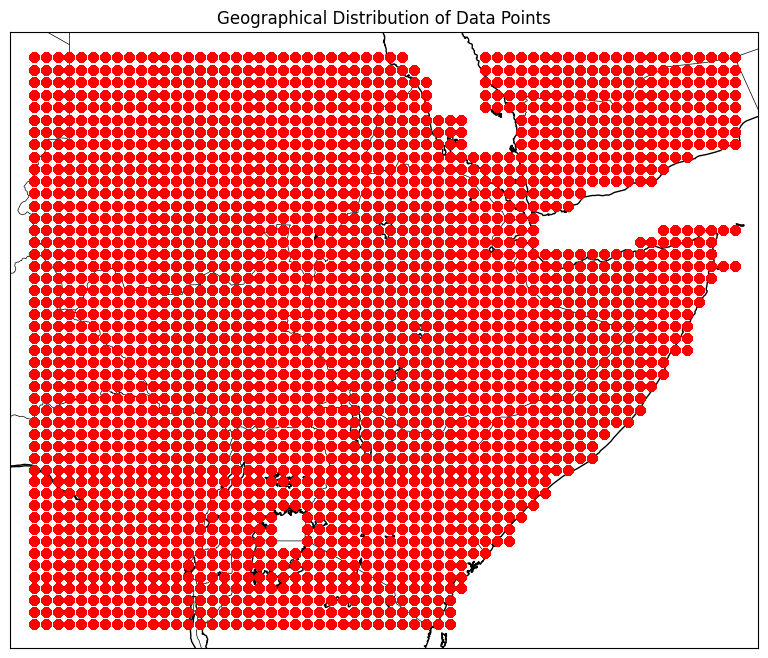

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def visualize_regions_polars(df):
    """
    Visualizes geographic regions directly from a Polars DataFrame using latitude and longitude columns.

    Parameters:
    - df (polars.DataFrame): Polars DataFrame containing 'lat' and 'lon' columns for plotting.

    Note:
    - Ensure that the 'mpl_toolkits.basemap' is installed.
    """
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap instance
    m = Basemap(projection='merc', llcrnrlat=df['lat'].min() - 1, urcrnrlat=df['lat'].max() + 1,
                llcrnrlon=df['lon'].min() - 1, urcrnrlon=df['lon'].max() + 1, resolution='i')

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Extract longitude and latitude data directly from Polars DataFrame
    lons, lats = m(df['lon'].to_numpy(), df['lat'].to_numpy())

    # Plot the points
    m.scatter(lons, lats, marker='o', color='red', zorder=5)

    plt.title('Geographical Distribution of Data Points')
    plt.show()

# Assuming 'clean_df' is your Polars DataFrame
visualize_regions_polars(clean_df)


Latency in CERES they providing data with 3-4 months delay

In [17]:
import pygadm

gdf = pygadm.Items(name=["Rwanda", "Burundi", "Uganda", "Kenya", "Somalia", "Ethiopia", "Eritrea", "Djibouti"])
gdf



,geometry,GID_0,NAME_0
0,"MULTIPOLYGON (((29.71330 -2.81760, 29.70820 -2...",RWA,Rwanda
0,"MULTIPOLYGON (((30.04520 -4.25680, 30.04730 -4...",BDI,Burundi
0,"MULTIPOLYGON (((29.91130 -1.47690, 29.90310 -1...",UGA,Uganda
0,"MULTIPOLYGON (((39.38010 -4.71790, 39.37740 -4...",KEN,Kenya
0,"MULTIPOLYGON (((45.08960 1.90760, 45.09100 1.9...",SOM,Somalia
0,"MULTIPOLYGON (((38.43720 3.60130, 38.34170 3.6...",ETH,Ethiopia
0,"MULTIPOLYGON (((42.93320 12.81850, 42.93150 12...",ERI,Eritrea
0,"MULTIPOLYGON (((43.08340 11.18200, 43.00130 11...",DJI,Djibouti


In [18]:
import polars as pl
import geopandas as gpd
from shapely.geometry import Point

def filter_dataframe_by_country(df, gdf):
    """
    Filters a Polars DataFrame based on country polygons.

    Parameters:
    - df (pl.DataFrame): Input Polars DataFrame with 'lat' and 'lon' columns.
    - gdf (gpd.GeoDataFrame): GeoDataFrame with country polygons.

    Returns:
    - pl.DataFrame: Filtered DataFrame with entries only within specified countries.
    """
    # Ensure gdf has a defined CRS
    if gdf.crs is None:
        gdf.set_crs("EPSG:4326", inplace=True)
    elif gdf.crs.to_string() != 'EPSG:4326':
        gdf = gdf.to_crs("EPSG:4326")

    # Convert Polars DataFrame to Pandas DataFrame to create GeoDataFrame
    unique_coords = df.select(['lat', 'lon']).unique().to_pandas()
    points_gdf = gpd.GeoDataFrame(unique_coords, geometry=[Point(xy) for xy in zip(unique_coords['lon'], unique_coords['lat'])], crs="EPSG:4326")

    # Spatial join to find points within the country polygons
    valid_points = gpd.sjoin(points_gdf, gdf, how="inner", predicate='intersects')
    valid_points_df = pl.from_pandas(valid_points[['lat', 'lon']])
    
    # Filter original DataFrame
    filtered_df = df.join(valid_points_df, on=['lat', 'lon'], how='semi')

    return filtered_df

# Example usage assuming 'clean_df' is your Polars DataFrame and 'gdf' is loaded using pygadm.Items
filtered_df = filter_dataframe_by_country(clean_df, gdf)


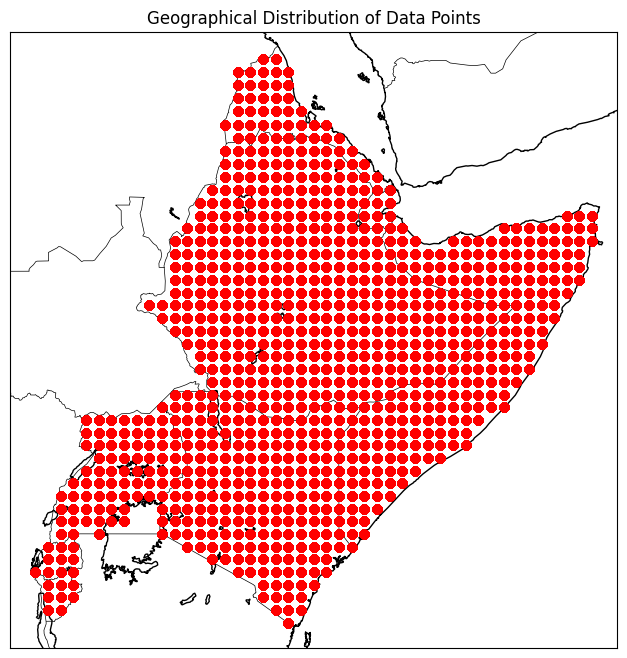

In [19]:
visualize_regions_polars(filtered_df)

In [25]:
filtered_df

time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
datetime[ns],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2001-01-01 00:00:00,-4.5,39.0,0.00001,28.270312,299.507812,300.459375,97890.3125,3.1796875,4.328125,0.015601,73.1,0.5484375,0.575,0.51875,46.671875,253.414062
2001-01-01 00:00:00,-4.0,29.5,0.000039,68.664062,295.8375,296.221875,87611.325,0.91875,1.3640625,0.0140625,72.0375,0.8203125,0.821875,0.8390625,93.84375,193.671875
2001-01-01 00:00:00,-4.0,30.0,0.000063,51.226562,293.84375,293.578125,85654.125,0.15625,0.8203125,0.013672,78.4375,0.7578125,0.765625,0.7890625,93.867188,197.355469
2001-01-01 00:00:00,-4.0,38.5,0.00001,6.78125,298.535937,300.082812,94193.65,3.0640625,4.3265625,0.013721,67.4375,0.534375,0.5625,0.478125,44.941406,242.082031
2001-01-01 00:00:00,-4.0,39.0,0.000006,6.60625,299.479688,301.001562,96774.2,3.2671875,4.5953125,0.014575,68.9125,0.49375,0.525,0.4375,45.03125,243.742188
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-01-01 00:00:00,17.0,38.0,0.000017,0.8125,295.495313,297.910937,91093.9,1.75625,2.375,0.011987,69.075,0.3953125,0.4015625,0.3578125,22.953125,183.226562
2024-01-01 00:00:00,17.0,38.5,0.000033,1.15,295.746875,297.707812,93069.375,1.934375,2.5296875,0.013696,76.3625,0.4359375,0.4390625,0.425,41.199219,150.332031
2024-01-01 00:00:00,17.0,39.0,0.000037,1.103125,297.9625,299.367188,97604.85,2.16875,2.6328125,0.015527,77.6625,0.4640625,0.4640625,0.621875,46.833984,150.035156


In [ ]:
# # Create unique indices for each country if not already unique
# gdf['country_index'] = range(len(gdf))

# countries_mask = regionmask.Regions(
#     outlines=gdf['geometry'].values,
#     names=gdf['NAME_0'].values,
#     numbers=gdf['country_index'].values,  # Use the new unique index
#     abbrevs=gdf['GID_0'].values
# )

# # Generate the mask
# mask = countries_mask.mask(ds['lon'], ds['lat'], wrap_lon=True)

# # Apply the mask to the dataset
# masked_dataset = ds.where(mask.notnull())

In [20]:
# Save the DataFrame with compression
filtered_df.write_parquet("/workspace/soil-ml-modeling-pipeline/ml-modeling-pipeline/data/02_intermediate/preprocessed_power_nasa_data.parquet", compression="snappy")

In [41]:
import polars as pl
import pandas as pd
import xarray as xr

# Assuming 'filtered_df' is your initial Polars DataFrame
pdf = filtered_df.to_pandas()

In [42]:
pdf.head()

,time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
0,2001-01-01,-4.5,39.0,0.000010,28.270312,299.507812,300.459375,97890.3125,3.179688,4.328125,0.015601,73.1000,0.548438,0.575000,0.518750,46.671875,253.414062
1,2001-01-01,-4.0,29.5,0.000039,68.664062,295.837500,296.221875,87611.3250,0.918750,1.364062,0.014063,72.0375,0.820312,0.821875,0.839063,93.843750,193.671875
2,2001-01-01,-4.0,30.0,0.000063,51.226562,293.843750,293.578125,85654.1250,0.156250,0.820312,0.013672,78.4375,0.757812,0.765625,0.789062,93.867188,197.355469
3,2001-01-01,-4.0,38.5,0.000010,6.781250,298.535937,300.082812,94193.6500,3.064062,4.326562,0.013721,67.4375,0.534375,0.562500,0.478125,44.941406,242.082031
4,2001-01-01,-4.0,39.0,0.000006,6.606250,299.479688,301.001562,96774.2000,3.267187,4.595313,0.014575,68.9125,0.493750,0.525000,0.437500,45.031250,243.742188


In [43]:
# # Sort and set MultiIndex without filling every possible combination
# pdf.sort_values(['time', 'lat', 'lon'], inplace=True)
# pdf.set_index(['time', 'lat', 'lon'], inplace=True)


In [44]:
pdf

,time,lat,lon,PRECTOTCORR,EVPTRNS,T2M,TS,PS,WS2M,WS10M,QV2M,RH2M,GWETROOT,GWETPROF,GWETTOP,CLOUD_AMT,ALLSKY_SFC_SW_DWN
0,2001-01-01,-4.5,39.0,0.000010,28.270312,299.507812,300.459375,97890.3125,3.179688,4.328125,0.015601,73.1000,0.548438,0.575000,0.518750,46.671875,253.414062
1,2001-01-01,-4.0,29.5,0.000039,68.664062,295.837500,296.221875,87611.3250,0.918750,1.364062,0.014063,72.0375,0.820312,0.821875,0.839063,93.843750,193.671875
2,2001-01-01,-4.0,30.0,0.000063,51.226562,293.843750,293.578125,85654.1250,0.156250,0.820312,0.013672,78.4375,0.757812,0.765625,0.789062,93.867188,197.355469
3,2001-01-01,-4.0,38.5,0.000010,6.781250,298.535937,300.082812,94193.6500,3.064062,4.326562,0.013721,67.4375,0.534375,0.562500,0.478125,44.941406,242.082031
4,2001-01-01,-4.0,39.0,0.000006,6.606250,299.479688,301.001562,96774.2000,3.267187,4.595313,0.014575,68.9125,0.493750,0.525000,0.437500,45.031250,243.742188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619702,2024-01-01,17.0,38.0,0.000017,0.812500,295.495313,297.910937,91093.9000,1.756250,2.375000,0.011987,69.0750,0.395313,0.401562,0.357812,22.953125,183.226562
7619703,2024-01-01,17.0,38.5,0.000033,1.150000,295.746875,297.707812,93069.3750,1.934375,2.529688,0.013696,76.3625,0.435937,0.439063,0.425000,41.199219,150.332031
7619704,2024-01-01,17.0,39.0,0.000037,1.103125,297.962500,299.367188,97604.8500,2.168750,2.632812,0.015527,77.6625,0.464062,0.464062,0.621875,46.833984,150.035156
7619705,2024-01-01,17.5,38.0,0.000014,2.050000,293.898438,296.357813,89955.1125,1.929688,2.543750,0.011963,73.7500,0.403125,0.403125,0.381250,27.925781,175.750000


In [45]:
# Convert the DataFrame to xarray
ds = pdf.to_xarray()

In [46]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:            (index: 7619707)
Coordinates:
  * index              (index) int64 61MB 0 1 2 3 ... 7619704 7619705 7619706
Data variables: (12/17)
    time               (index) datetime64[ns] 61MB 2001-01-01 ... 2024-01-01
    lat                (index) float64 61MB -4.5 -4.0 -4.0 ... 17.0 17.5 17.5
    lon                (index) float64 61MB 39.0 29.5 30.0 ... 39.0 38.0 38.5
    PRECTOTCORR        (index) float64 61MB 9.873e-06 3.933e-05 ... 1.93e-05
    EVPTRNS            (index) float64 61MB 28.27 68.66 51.23 ... 2.05 1.545
    T2M                (index) float64 61MB 299.5 295.8 293.8 ... 293.9 296.4
    ...                 ...
    RH2M               (index) float64 61MB 73.1 72.04 78.44 ... 73.75 75.28
    GWETROOT           (index) float64 61MB 0.5484 0.8203 ... 0.4031 0.4328
    GWETPROF           (index) float64 61MB 0.575 0.8219 ... 0.4031 0.4328
    GWETTOP            (index) float64 61MB 0.5188 0.8391 ... 0.3812 0.4203
    CLOUD_AMT          (index) float64 61MB 46.67 93.84 93.87 ... 27.93 50.48
    ALLSKY_SFC_SW_DWN  (index) float64 61MB 253.4 193.7 197.4 ... 175.8 137.5

In [50]:
ds = ds.expand_dims(ds.time)

TypeError: unhashable type: 'DataArray'

In [49]:
import xarray as xr

# Example: Loading your dataset (assuming it's loaded into a variable called ds)
# ds = xr.open_dataset("path_to_your_dataset.nc")

# Setting 'time', 'lat', 'lon' as coordinates
ds = ds.set_coords(['time', 'lat', 'lon'])

# Assuming 'time', 'lat', 'lon' have a 1-to-1 mapping with 'index'
# We first set them as coordinates, then we can drop the 'index' if it's no longer needed
ds = ds.drop_vars('index')

# Check if 'time', 'lat', 'lon' can be directly used to reindex the dataset
# If 'time', 'lat', 'lon' each has unique values that fully cover the grid, you can reshape
unique_times = ds.time.to_index().unique()
unique_lats = ds.lat.to_index().unique()
unique_lons = ds.lon.to_index().unique()

# You may need to perform an operation like this, depending on your data setup:
ds = ds.unstack('index')

# Reshape dataset by assigning new multi-dimensional structure
ds = ds.set_index(time='time', lat='lat', lon='lon')


ValueError: cannot unstack dimensions that do not have exactly one multi-index: ('index',)

In [ ]:
# Define compression settings
compression_opts = {'zlib': True, 'complevel': 5}  # You can adjust the compression level from 1 to 9

# Apply the compression to each variable in the dataset
encoding = {var: compression_opts for var in ds_filtered.variables}

# Export the region as a compressed NetCDF4 file
ds_filtered.to_netcdf(
    path=os.path.join("/workspace/soil-ml-modeling-pipeline/ml-modeling-pipeline/data/02_intermediate/preprocessed_power_nasa_data.nc"),
    encoding=encoding
)
